In [1]:
import numpy as np
import kal_exp
import scipy

from matplotlib import pyplot as plt

In [2]:
T = 10
dt = .2
sigma_z = .1
sigma_x = 1
z, x_true, x_dot_true, H, times = kal_exp.gen_data(1, stop=s, dt=dt, meas_var=sigma_z, process_var=sigma_x)
delta_times = times[1:]-times[:-1]
G = kal_exp.gen_G(delta_times)
Qinv = kal_exp.gen_Qinv(delta_times, sigma_x)
R = sigma_z * scipy.sparse.eye(len(z))
Rinv = 1/sigma_z * scipy.sparse.eye(len(z))

Pi = G.T @ Qinv @ G
Theta = H.T @ Rinv @ H

def trace_val(Pi, Theta):
    return np.trace(scipy.linalg.inv((Pi + Theta).toarray()) @ Pi)


def alpha(H, G, Qinv, z):
    L = scipy.linalg.cholesky(Qinv.toarray())
    HGinv = scipy.linalg.inv((H.T @ H + G.T @ G).toarray())
    return np.linalg.norm(L.T @ G @ HGinv @ H.T @ z)


def error(z, H, G, Qinv, Rinv):
    Pi = G.T @ Qinv @ G
    Theta = H.T @ Rinv @ H
    return (len(z)-1)/sigma_z - alpha(H, G, Qinv, z) - 1/2 * trace_val(Pi, Theta)

NameError: name 's' is not defined

In [53]:
dts = np.logspace(-.1, -2, 10)
Ts = np.logspace(0,2, 6)
seed = 1
T = 1
dt = .2
sigma_z = .1
sigma_x = 1

traces = []
for dt in dts:
    z, x_true, x_dot_true, H, times = kal_exp.gen_data(
        seed=seed, stop=T, dt=dt, meas_var=sigma_z, process_var=sigma_x
    )
    delta_times = times[1:]-times[:-1]
    G = kal_exp.gen_G(delta_times)
    Qinv = kal_exp.gen_Qinv(delta_times, sigma_x)
    R = sigma_z * scipy.sparse.eye(len(z))
    Rinv = 1/sigma_z * scipy.sparse.eye(len(z))
    Pi = G.T @ Qinv @ G
    Theta = H.T @ Rinv @ H
    traces.append(1/2 * trace_val(Pi, Theta))
    print(error(z, H, G, Qinv, Rinv))

9.0
17.376792622552262
25.57333147147395
40.64811512721659
47.61229923488054
73.12841845386964
109.04394403319776
21.72023820587976
-360.25403983415663
-1221.2702124985062


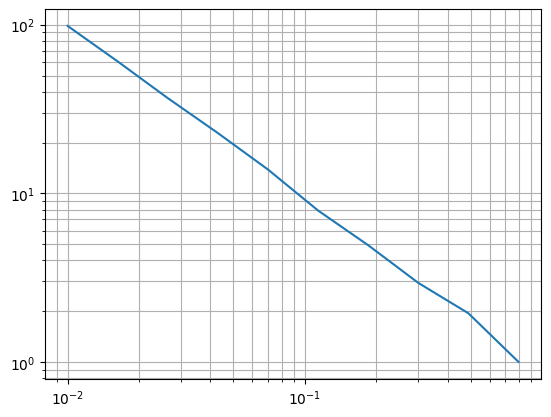

In [60]:
plt.loglog(dts, traces)
plt.grid(which="both")

In [61]:
traces = []
dt = .5
for T in Ts:
    z, x_true, x_dot_true, H, times = kal_exp.gen_data(
        seed=seed, stop=T, dt=dt, meas_var=sigma_z, process_var=sigma_x
    )
    delta_times = times[1:]-times[:-1]
    G = kal_exp.gen_G(delta_times)
    Qinv = kal_exp.gen_Qinv(delta_times, sigma_x)
    R = sigma_z * scipy.sparse.eye(len(z))
    Rinv = 1/sigma_z * scipy.sparse.eye(len(z))
    Pi = G.T @ Qinv @ G
    Theta = H.T @ Rinv @ H
    traces.append(1/2 * trace_val(Pi, Theta))
    print(error(z, H, G, Qinv, Rinv))

9.0
44.241155919440736
104.28808895697397
274.73079542057616
709.3762100797679
1801.0631698282332


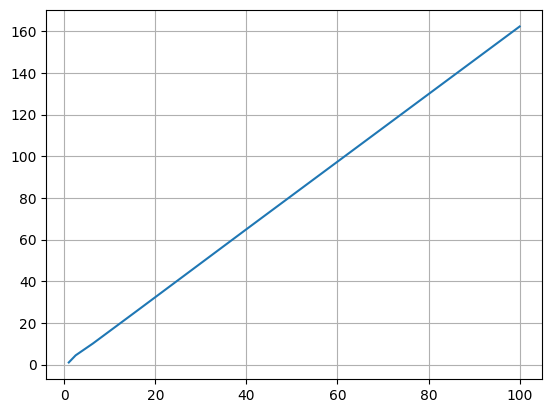

In [63]:
plt.plot(Ts, traces)
plt.grid(which="both")

In [74]:
T = 10
dt = .2
sigmas = np.logspace(-4, 4, 6)

traces = []
dt = .5
for sigma in sigmas:
    z, x_true, x_dot_true, H, times = kal_exp.gen_data(
        seed=seed, stop=T, dt=dt, meas_var=sigma_z, process_var=sigma
    )
    delta_times = times[1:]-times[:-1]
    G = kal_exp.gen_G(delta_times)
    Qinv = kal_exp.gen_Qinv(delta_times, sigma)
    R = sigma_z * scipy.sparse.eye(len(z))
    Rinv = 1/sigma_z * scipy.sparse.eye(len(z))
    Pi = G.T @ Qinv @ G
    Theta = H.T @ Rinv @ H
    traces.append(1/2 * trace_val(Pi, Theta))
    print(error(z, H, G, Qinv, Rinv))

179.9636186037656
179.4689731214804
174.99412399429042
150.03491787504208
-707.0657588618375
-34819.05680717166


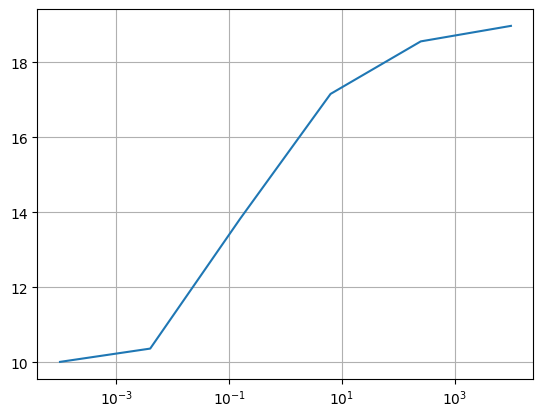

In [75]:
plt.semilogx(sigmas, traces)
plt.grid(which="both")